Reference: https://github.com/tensorchiefs/dl_book/tree/master/chapter_04

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [6]:
def create_sine_data(n = 300):
    np.random.seed(32)
    m = int(n/5)
    x1 = np.linspace(0, 2*np.pi, n)
    y1 = 3*np.sin(x1)
    y1 += np.random.normal(0, 0.15*np.abs(y1), n)
    y1 = np.concatenate((np.zeros(m), y1, np.zeros(m)))

    x = np.concatenate((np.linspace(-3, 0, m), np.linspace(0, 6*np.pi, n), np.linspace(6*np.pi, 6*np.pi+3, m)))
    y2 = 0.1*x + 1
    y = y1 + y2
    return x, y

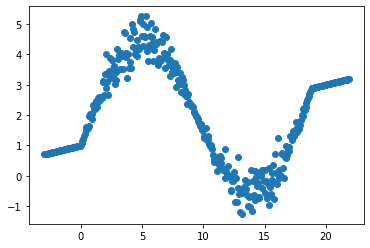

In [8]:
n = 300
x,y = create_sine_data(n)
plt.scatter(x=x, y=y, marker='o')

## NN for a non-linear regression model with constant variance

$ y_i \sim N(\mu_{x_i}, \sigma)$

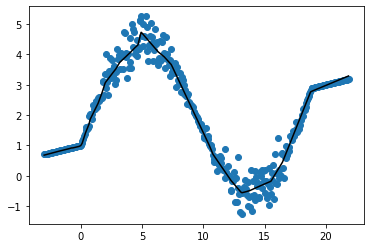

In [23]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(1,)),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer="adam")

history = model.fit(x, y, batch_size=16, epochs=1000, verbose=0)

x_test = np.linspace(-3, 6*np.pi + 3, 1000)
y_pred = model.predict(x_test.reshape(len(x_test), 1)) 

plt.scatter(x, y)
plt.plot(x_test, y_preds, c="black")

## NN for a non-linear regression model with changing variance

$ y_i \sim N(\mu_{x_i}, \sigma_{x_i})$

loss = NLL = $\sum_i \left(-\log  \frac{1}{\sqrt{2\pi} \sigma_{x_i}}  + \frac{(\mu_{x_i} - y_i)^2}{2 \sigma_{x_i}^2}\right)$

In [24]:
model = Sequential([
    Dense(20, activation='relu', input_shape=(1,)),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(2)
])

def NLL(y_true, output):
    mu = tf.slice(output, [0,0], [-1,1])                  # output[:,0:1]
    sigma = tf.math.exp(tf.slice(output, [0,1], [-1,1]))  # exp(output[:,1:])
    
    a = 1. / (tf.sqrt(2.*np.pi)*sigma)
    b = tf.square(mu - y_true) / (2*tf.square(sigma))
    loss = tf.reduce_sum(-tf.math.log(a) + b, axis=0)
    return loss

model.compile(loss=NLL, optimizer="adam")

history = model.fit(x, y, batch_size=16, epochs=1000, verbose=0)

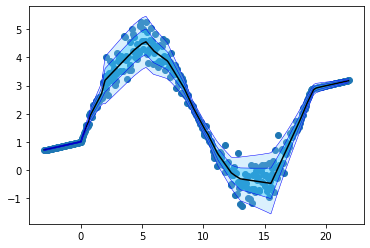

In [25]:
output = model.predict(x_test.reshape(len(x_test), 1))
pred_mu = output[:,0]
pred_sigma = np.exp(output[:,1]) 

plt.scatter(x, y)

plt.plot(x_test, pred_mu, c="black")

pred_1_sd_p = pred_mu + pred_sigma
pred_1_sd_m = pred_mu - pred_sigma
plt.plot(x_test, pred_1_sd_p, 'b', linewidth=0.5) 
plt.plot(x_test, pred_1_sd_m, 'b', linewidth=0.5)

pred_2_sd_p = pred_mu + 2*pred_sigma
pred_2_sd_m = pred_mu - 2*pred_sigma
plt.plot(x_test, pred_2_sd_p, 'b', linewidth=0.5) 
plt.plot(x_test, pred_2_sd_m, 'b', linewidth=0.5)

plt.fill_between(x_test, pred_2_sd_p, pred_2_sd_m ,alpha=0.3, fc='lightskyblue', ec='None')
plt.fill_between(x_test, pred_1_sd_p, pred_1_sd_m, alpha=0.3, fc='deepskyblue', ec='None')